<center><h1>1-ab: Introduction to Neural Networks</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [ ]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
!unzip -j 2-ab.zip
!wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-ab/utils-data.py

--2023-10-28 16:15:25--  https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip [following]
--2023-10-28 16:15:26--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13423991 (13M) [application/zip]
Saving to: ‘2-ab.zip’

2-ab.zip            100%[===================>]  12.80M  --.-KB/s    in 0.1s    

2023-10-28 16:15:26 (101 MB/s) - ‘2-ab.zip’ saved [13423991/13423991]

Archive:  2-ab.zip
  inflating: ._2-ab            

In [ ]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'utils-data.py'

# Part 1 : Forward and backward passes "by hands"

In [ ]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    # Xavier initialization
    std_W_h = torch.sqrt(torch.tensor(2.0 / (nx + nh)))
    std_W_y = torch.sqrt(torch.tensor(2.0 / (nh + ny)))

    params["Wh"] = torch.randn(nh, nx) * std_W_h
    params["Wy"] = torch.randn(ny, nh) * std_W_y
    params["bh"] = torch.zeros(1,nh)
    params["by"] = torch.zeros(1,ny)

    return params


In [ ]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].shape[0]
    ny = params['Wy'].shape[0]
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat

    outputs["X"] = X
    outputs["htilde"] = torch.mm(X,params['Wh'].T) + params["bh"]
    outputs["h"] = torch.tanh( outputs["htilde"] )
    outputs["ytilde"] = torch.mm(outputs["h"],params['Wy'].T) + params["by"]
    outputs["yhat"] = torch.softmax(outputs["ytilde"],1)

    ####################
    ##      END        #
    ####################

    return outputs['yhat'], outputs

In [ ]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    L = - torch.mean(torch.sum(Y * torch.log(Yhat), dim=1))
    _,index_yhat=torch.max(Yhat,1)
    _,index_y=torch.max(Y,1)
    acc = torch.sum(index_y==index_yhat)/Y.shape[0]

    ####################
    ##      END        #
    ####################

    return L, acc

In [ ]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh

    delta_y_thilde=(outputs["yhat"] - Y)
    delta_h_thilde =( torch.mm(delta_y_thilde , params["Wy"])) * (1-outputs["h"]**2)

    grads["Wy"] = delta_y_thilde.T @ outputs["h"]
    grads["Wh"] = delta_h_thilde.T @ outputs["X"]
    grads["by"] = torch.sum(delta_y_thilde,0)
    grads["bh"] = torch.sum(delta_h_thilde,0)

    ####################
    ##      END        #
    ####################
    return grads

In [ ]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    params["Wh"] -= eta * grads["Wh"]
    params["Wy"] -= eta * grads["Wy"]
    params["bh"] -= eta * grads["bh"]
    params["by"] -= eta * grads["by"]


    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure "by hands"

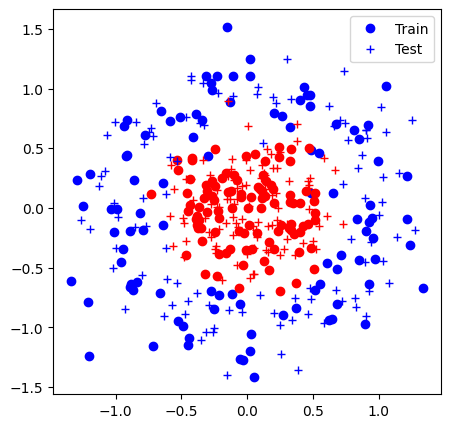

Iter 0: Acc train 37.0% (0.70), acc test 40.5% (0.70)
Iter 1: Acc train 70.0% (0.67), acc test 64.0% (0.68)
Iter 2: Acc train 76.0% (0.61), acc test 69.0% (0.62)
Iter 3: Acc train 81.0% (0.52), acc test 76.5% (0.54)
Iter 4: Acc train 74.5% (0.49), acc test 71.0% (0.56)
Iter 5: Acc train 69.5% (0.52), acc test 73.5% (0.50)
Iter 6: Acc train 94.0% (0.26), acc test 95.0% (0.26)
Iter 7: Acc train 93.0% (0.22), acc test 93.0% (0.25)
Iter 8: Acc train 93.5% (0.20), acc test 92.5% (0.23)
Iter 9: Acc train 92.0% (0.23), acc test 91.0% (0.24)
Iter 10: Acc train 95.0% (0.18), acc test 93.0% (0.20)
Iter 11: Acc train 92.5% (0.19), acc test 92.0% (0.19)
Iter 12: Acc train 93.0% (0.18), acc test 95.5% (0.17)
Iter 13: Acc train 93.0% (0.18), acc test 94.0% (0.19)
Iter 14: Acc train 94.5% (0.16), acc test 95.0% (0.16)
Iter 15: Acc train 95.0% (0.17), acc test 95.0% (0.18)
Iter 16: Acc train 92.5% (0.18), acc test 94.5% (0.17)
Iter 17: Acc train 92.5% (0.15), acc test 93.5% (0.19)
Iter 18: Acc train 9

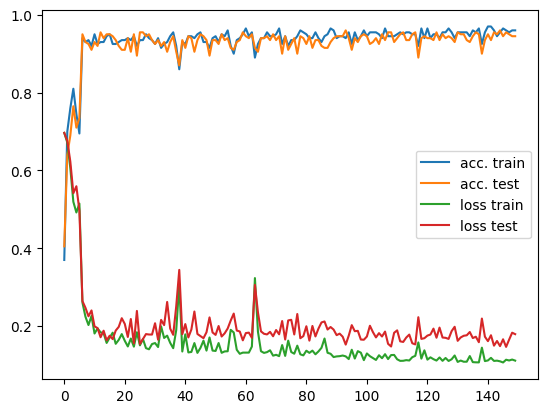

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.1

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):
    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    if iteration != 0 and iteration%10 == 0 :
      eta = eta*0.9
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd

        #forward
        yhat, outputs=forward(params, X)

        #locc_acc
        L, acc = loss_accuracy(yhat, Y)

        #backward
        grads=backward(params, outputs, Y)

        #maj
        params = sgd(params, grads, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain*100, Ltrain, acctest*100, Ltest)
    print(title)
    #data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

#### variation des hyper param

In [ ]:
import pandas as pd

def variation_hp(tite_plot,epoch=150,eta=0.1,Nbatch=10):
  params = init_params(nx, nh, ny)

  curves = [[],[], [], []]

  acc_train,loss_train,acc_test,loss_test=None,None,None,None

  # epoch
  for iteration in range(epoch):
      # permute
      perm = np.random.permutation(N)
      Xtrain = data.Xtrain[perm, :]
      Ytrain = data.Ytrain[perm, :]

      #####################
      ## Your code here  ##
      #####################
      # batches
      if iteration != 0 and iteration%10 == 0 :
        eta = eta*0.9
      for j in range(N // Nbatch):

          indsBatch = range(j * Nbatch, (j+1) * Nbatch)
          X = Xtrain[indsBatch, :]
          Y = Ytrain[indsBatch, :]

          # write the optimization algorithm on the batch (X,Y)
          # using the functions: forward, loss_accuracy, backward, sgd

          #forward
          yhat, outputs=forward(params, X)

          #locc_acc
          L, acc = loss_accuracy(yhat, Y)

          #backward
          grads=backward(params, outputs, Y)

          #maj
          params = sgd(params, grads, eta)

      ####################
      ##      END        #
      ####################


      Yhat_train, _ = forward(params, data.Xtrain)
      Yhat_test, _ = forward(params, data.Xtest)
      Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
      Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
      Ygrid, _ = forward(params, data.Xgrid)

      if iteration == epoch-1:
        acc_train,loss_train,acc_test,loss_test=acctrain*100, Ltrain, acctest*100, Ltest

      curves[0].append(acctrain)
      curves[1].append(acctest)
      curves[2].append(Ltrain)
      curves[3].append(Ltest)

  fig = plt.figure()
  plt.title(tite_plot)
  plt.plot(curves[0], label="acc. train")
  plt.plot(curves[1], label="acc. test")
  plt.plot(curves[2], label="loss train")
  plt.plot(curves[3], label="loss test")
  plt.legend()
  plt.show()
  return acc_train,loss_train,acc_test,loss_test

#### variation de LR

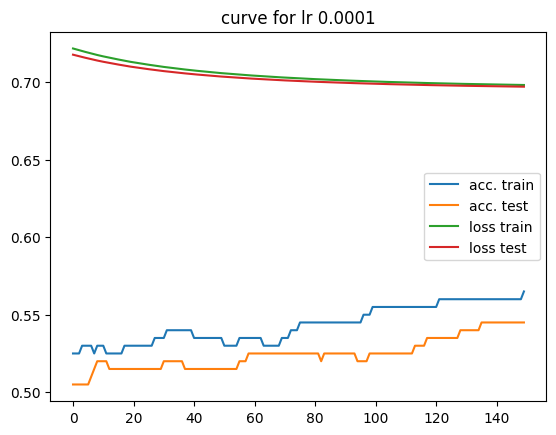

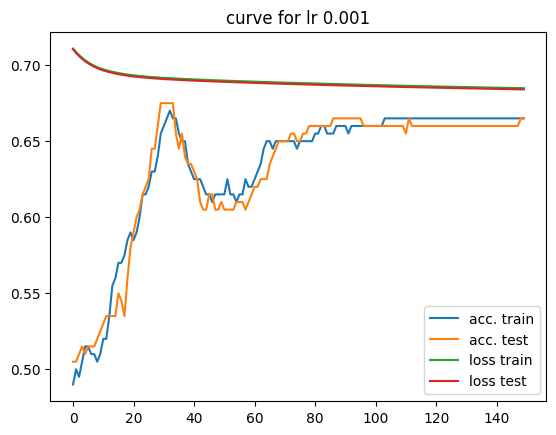

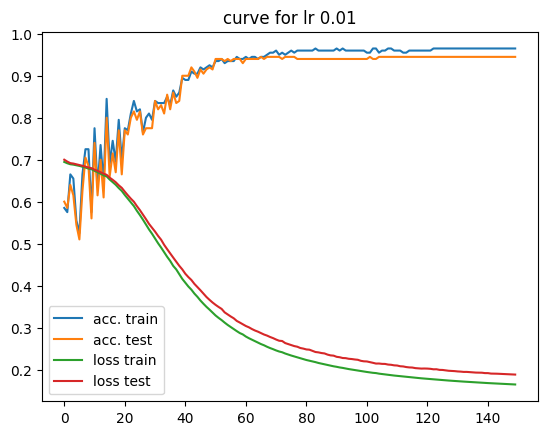

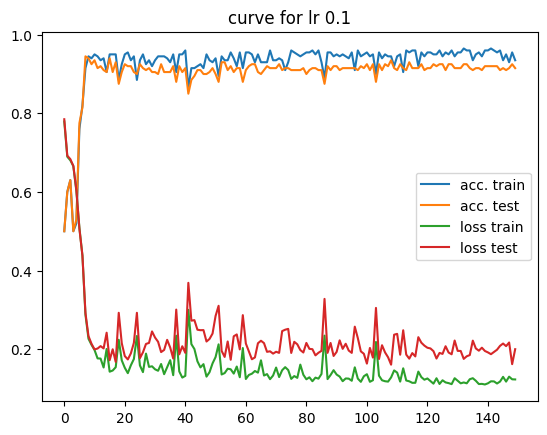

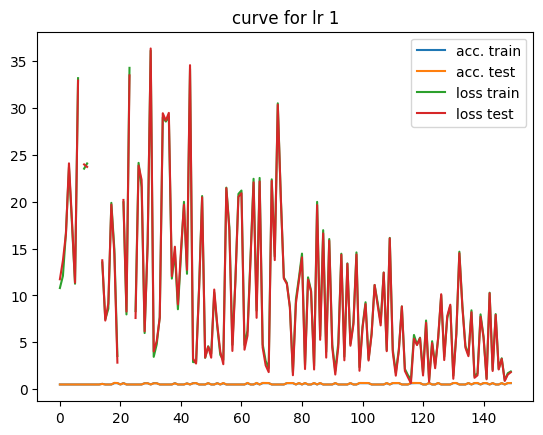

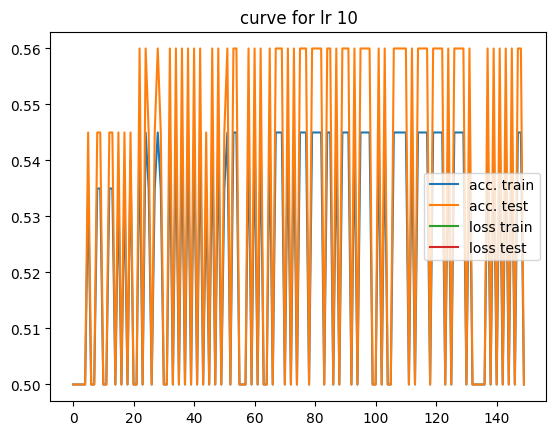

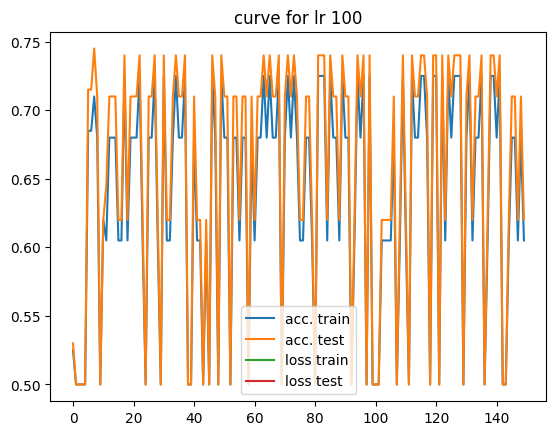

In [ ]:
np.random.seed(0)
d={'acc_train':[],'loss_train':[],'acc_test':[],'loss_test':[]}

for lr in [0.0001,0.001,0.01,0.1,1,10,100]:
  acc_train,loss_train,acc_test,loss_test=variation_hp(f'curve for lr {lr}',eta=lr)
  d['acc_train'].append(acc_train)
  d['loss_train'].append(loss_train)
  d['acc_test'].append(acc_test)
  d['loss_test'].append(loss_test)

In [ ]:
pd.DataFrame(data=d,index=[0.0001,0.001,0.01,0.1,1,10,100])

,acc_train,loss_train,acc_test,loss_test
0.0001,tensor(56.5000),tensor(0.6982),tensor(54.5000),tensor(0.6971)
0.0010,tensor(66.5000),tensor(0.6849),tensor(66.5000),tensor(0.6840)
0.0100,tensor(96.5000),tensor(0.1643),tensor(94.5000),tensor(0.1879)
0.1000,tensor(93.5000),tensor(0.1229),tensor(91.5000),tensor(0.1999)
1.0000,tensor(64.),tensor(1.8893),tensor(65.5000),tensor(1.8066)
10.0000,tensor(50.),tensor(nan),tensor(50.),tensor(nan)
100.0000,tensor(60.5000),tensor(nan),tensor(62.),tensor(nan)


#### variation de epoch

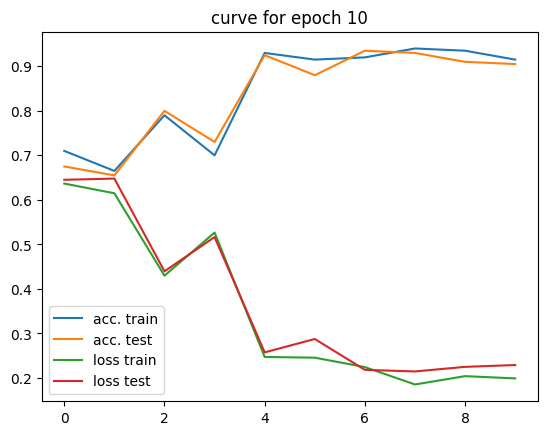

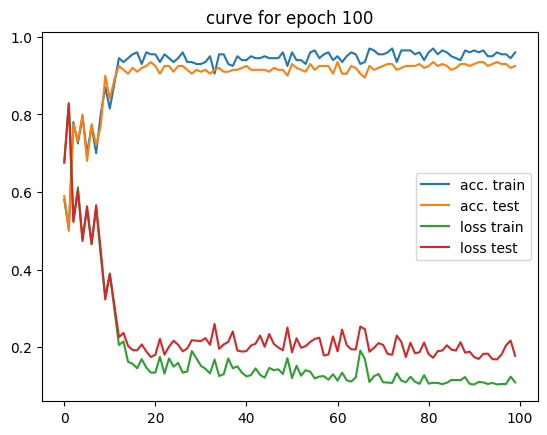

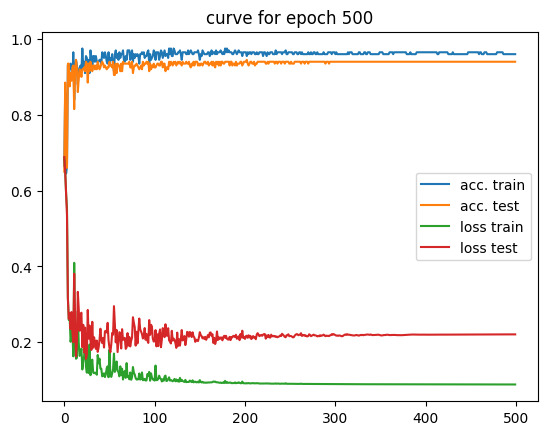

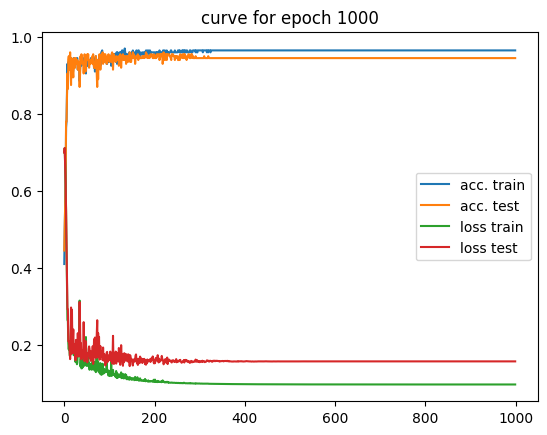

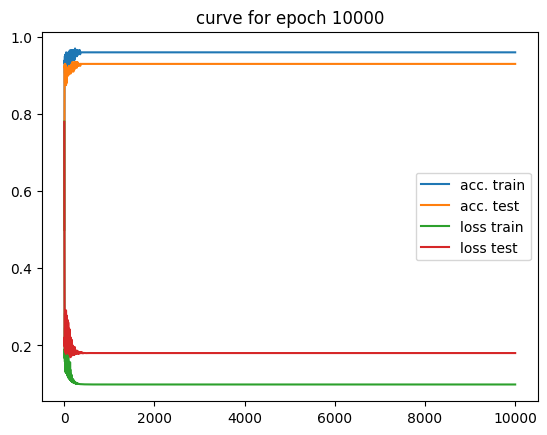

In [ ]:
np.random.seed(0)
d={'acc_train':[],'loss_train':[],'acc_test':[],'loss_test':[]}

for epoch in [10,100,500,1000,10000]:
  acc_train,loss_train,acc_test,loss_test=variation_hp(f'curve for epoch {epoch}',epoch=epoch)
  d['acc_train'].append(acc_train)
  d['loss_train'].append(loss_train)
  d['acc_test'].append(acc_test)
  d['loss_test'].append(loss_test)

In [ ]:
pd.DataFrame(data=d,index=[10,100,500,1000,10000])

,acc_train,loss_train,acc_test,loss_test
10,tensor(91.5000),tensor(0.1990),tensor(90.5000),tensor(0.2291)
100,tensor(96.),tensor(0.1093),tensor(92.5000),tensor(0.1775)
500,tensor(96.),tensor(0.0886),tensor(94.),tensor(0.2207)
1000,tensor(96.5000),tensor(0.0970),tensor(94.5000),tensor(0.1570)
10000,tensor(96.),tensor(0.0989),tensor(93.),tensor(0.1804)


#### variation de batch size (nombre de batch)

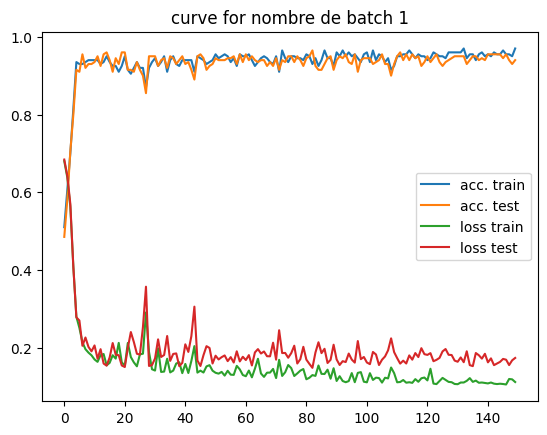

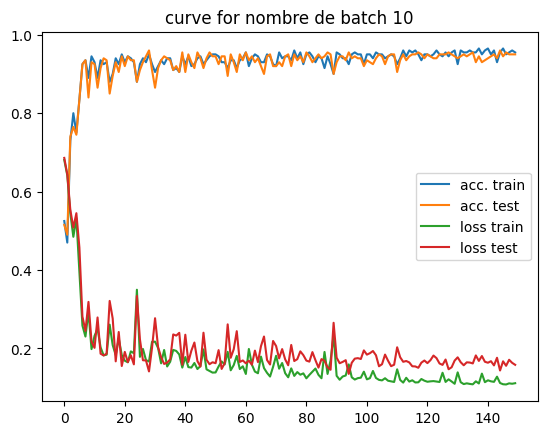

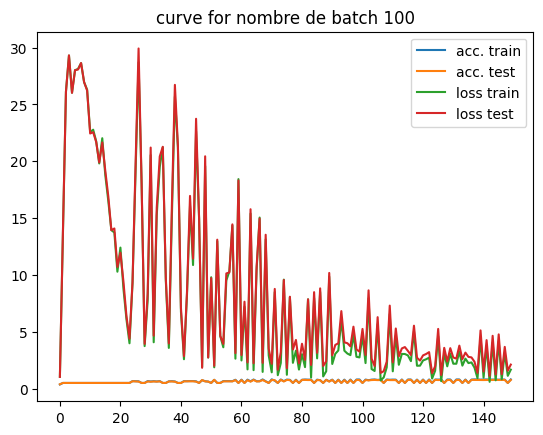

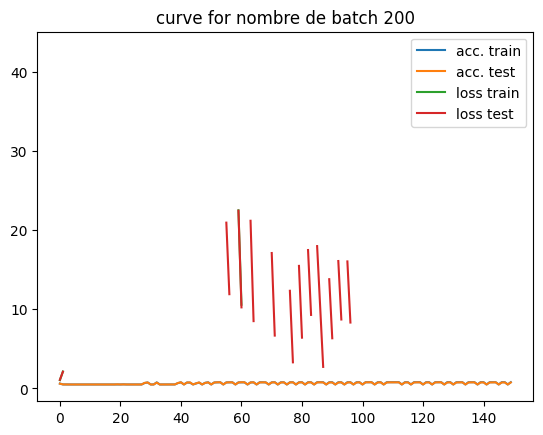

In [ ]:
np.random.seed(0)
d={'acc_train':[],'loss_train':[],'acc_test':[],'loss_test':[]}

for Nbatch in [1,10,100,N]:
  acc_train,loss_train,acc_test,loss_test=variation_hp(f'curve for nombre de batch {Nbatch}',Nbatch=Nbatch)
  d['acc_train'].append(acc_train)
  d['loss_train'].append(loss_train)
  d['acc_test'].append(acc_test)
  d['loss_test'].append(loss_test)

In [ ]:
pd.DataFrame(data=d,index=[1,10,100,N])

,acc_train,loss_train,acc_test,loss_test
1,tensor(97.),tensor(0.1114),tensor(94.),tensor(0.1734)
10,tensor(95.5000),tensor(0.1114),tensor(95.),tensor(0.1583)
100,tensor(81.),tensor(1.6701),tensor(76.),tensor(2.1132)
200,tensor(79.),tensor(nan),tensor(75.5000),tensor(nan)


# Part 2 : Simplification of the backward pass with `torch.autograd`





In [ ]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights

    params["Wh"] = torch.randn(nh, nx,requires_grad=True)
    params["Wy"] = torch.randn(ny, nh,requires_grad=True)
    params["bh"] = torch.zeros(1,nh,requires_grad=True)
    params["by"] = torch.zeros(1,ny,requires_grad=True)

    ####################
    ##      END        #
    ####################
    return params

The function `forward` remains unchanged from previous part.

The function `backward` is no longer used because of "autograd".

In [ ]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():  # Use torch.no_grad() to avoid tracking operations in autograd
        params['Wy'] -= eta * params['Wy'].grad
        params['Wh'] -= eta * params['Wh'].grad
        params['by'] -= eta * params['by'].grad
        params['bh'] -= eta * params['bh'].grad

        # remetre a zero le gradient
        params['Wy'].grad.zero_()
        params['Wh'].grad.zero_()
        params['by'].grad.zero_()
        params['bh'].grad.zero_()

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure with autograd

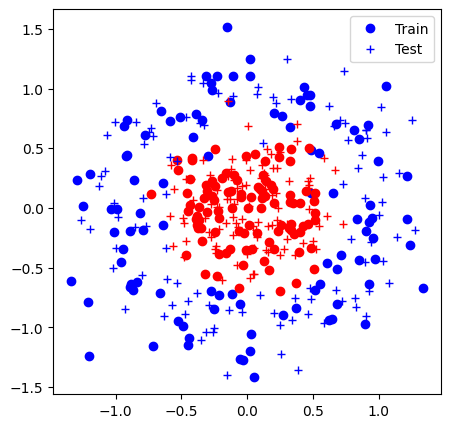

Iter 0: Acc train 61.5% (0.76), acc test 59.5% (0.74)
Iter 1: Acc train 64.5% (0.68), acc test 66.5% (0.66)
Iter 2: Acc train 69.0% (0.64), acc test 71.5% (0.62)
Iter 3: Acc train 69.5% (0.62), acc test 69.0% (0.61)
Iter 4: Acc train 70.0% (0.61), acc test 69.0% (0.59)
Iter 5: Acc train 73.5% (0.60), acc test 73.5% (0.58)
Iter 6: Acc train 74.5% (0.59), acc test 78.0% (0.57)
Iter 7: Acc train 76.0% (0.57), acc test 77.5% (0.56)
Iter 8: Acc train 77.5% (0.57), acc test 78.5% (0.56)
Iter 9: Acc train 77.0% (0.56), acc test 78.0% (0.55)
Iter 10: Acc train 78.5% (0.55), acc test 77.5% (0.54)
Iter 11: Acc train 78.5% (0.54), acc test 78.5% (0.53)
Iter 12: Acc train 78.0% (0.53), acc test 77.5% (0.53)
Iter 13: Acc train 77.5% (0.53), acc test 78.5% (0.52)
Iter 14: Acc train 78.0% (0.52), acc test 78.0% (0.51)
Iter 15: Acc train 80.0% (0.51), acc test 77.5% (0.51)
Iter 16: Acc train 80.0% (0.51), acc test 78.0% (0.50)
Iter 17: Acc train 79.5% (0.50), acc test 79.0% (0.50)
Iter 18: Acc train 8

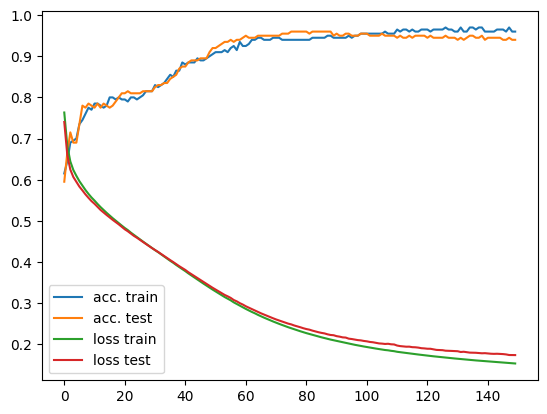

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, sgd
        # and the backward function with autograd

        #forward
        yhat, outputs=forward(params, X)

        #locc_acc
        L, acc = loss_accuracy(yhat, Y)

        #backward
        L.backward()

        #maj
        params = sgd(params, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain*100, Ltrain, acctest*100, Ltest)
    print(title)
    # detach() is used to remove the predictions from the computational graph in autograd
    #data.plot_data_with_grid(Ygrid.detach(), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach())
    curves[3].append(Ltest.detach())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [ ]:
def init_model(nx, nh, ny):
  model = torch.nn.Sequential(
  torch.nn.Linear(nx, nh),
  torch.nn.Tanh(),
  torch.nn.Linear(nh, ny)
  )
  loss = torch.nn.CrossEntropyLoss()
  return model, loss

In [ ]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function
    L = loss(Yhat, Y)
    _,index_yhat=torch.max(Yhat,1)
    _,index_y=torch.max(Y,1)
    acc = torch.sum(index_y==index_yhat)/Y.shape[0]
    ####################
    ##      END        #
    ####################

    return L, acc

In [ ]:
def sgd(model, eta):

    with torch.no_grad():
      for param in model.parameters():
        param -= eta * param.grad
      model.zero_grad()
    ####################
    ##      END        #
    ####################
    return model

## Global learning procedure with autograd and `torch.nn`

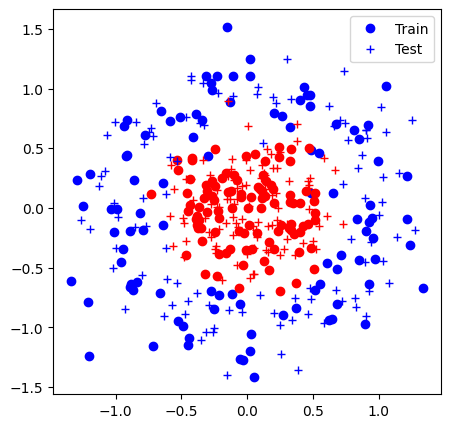

Iter 0: Acc train 42.5% (0.70), acc test 39.0% (0.70)
Iter 1: Acc train 50.0% (0.69), acc test 52.0% (0.69)
Iter 2: Acc train 61.5% (0.68), acc test 60.5% (0.69)
Iter 3: Acc train 60.0% (0.68), acc test 59.5% (0.68)
Iter 4: Acc train 62.0% (0.68), acc test 61.0% (0.68)
Iter 5: Acc train 64.5% (0.68), acc test 62.0% (0.68)
Iter 6: Acc train 69.5% (0.67), acc test 65.5% (0.68)
Iter 7: Acc train 65.5% (0.67), acc test 62.5% (0.68)
Iter 8: Acc train 70.0% (0.67), acc test 65.0% (0.67)
Iter 9: Acc train 71.0% (0.67), acc test 66.5% (0.67)
Iter 10: Acc train 70.5% (0.67), acc test 67.5% (0.67)
Iter 11: Acc train 73.0% (0.66), acc test 67.5% (0.67)
Iter 12: Acc train 73.5% (0.66), acc test 70.0% (0.67)
Iter 13: Acc train 73.5% (0.66), acc test 70.5% (0.66)
Iter 14: Acc train 72.0% (0.66), acc test 71.5% (0.66)
Iter 15: Acc train 72.5% (0.66), acc test 72.0% (0.66)
Iter 16: Acc train 75.0% (0.65), acc test 75.0% (0.66)
Iter 17: Acc train 75.5% (0.65), acc test 76.0% (0.66)
Iter 18: Acc train 7

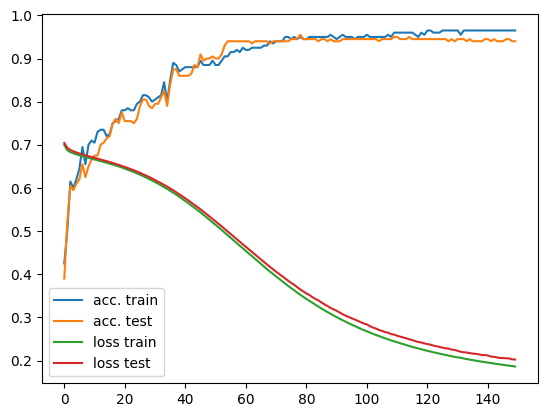

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss = init_model(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd
        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        model = sgd(model, eta)


    ####################
    ##      END        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain*100, Ltrain, acctest*100, Ltest)
    print(title)
    #data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach())
    curves[3].append(Ltest.detach())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

In [ ]:
def hyp(epcoh,Nbatch,eta):
  model, loss = init_model(nx, nh, ny)

  curves = [[],[], [], []]

  # epoch
  for iteration in range(epoch):

      # permute
      perm = np.random.permutation(N)
      Xtrain = data.Xtrain[perm, :]
      Ytrain = data.Ytrain[perm, :]

      #####################
      ## Your code here  ##
      #####################
      # batches
      for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd
        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        model = sgd(model, eta)


      ####################
      ##      END        #
      ####################


      Yhat_train = model(data.Xtrain)
      Yhat_test = model(data.Xtest)
      Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
      Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
      Ygrid = model(data.Xgrid)

      title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain*100, Ltrain, acctest*100, Ltest)
      print(title)
      #data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

      curves[0].append(acctrain)
      curves[1].append(acctest)
      curves[2].append(Ltrain.detach())
      curves[3].append(Ltest.detach())

  fig = plt.figure()
  plt.title
  plt.plot(curves[0], label="acc. train")
  plt.plot(curves[1], label="acc. test")
  plt.plot(curves[2], label="loss train")
  plt.plot(curves[3], label="loss test")
  plt.legend()
  plt.show()

# Part 4 : Simplification of the SGD with `torch.optim`

In [ ]:
def init_model(nx, nh, ny, eta):

      #####################
      ## Your code here  ##
      #####################

    model = torch.nn.Sequential(
    torch.nn.Linear(nx, nh),
    torch.nn.Tanh(),
    torch.nn.Linear(nh, ny)
    )
    loss = torch.nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(),lr=eta)

    ####################rain 94.5% (0.30), acc test 93.0% (0.31)


    ##      END        #
    ####################

    return model, loss, optim

The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after.

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

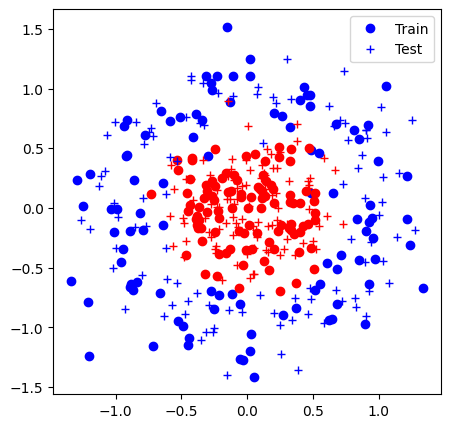

torch.Size([200, 2])
torch.Size([200, 2])
torch.Size([1600, 2])
Iter 0: Acc train 36.0% (0.70), acc test 37.0% (0.70)
Iter 1: Acc train 41.5% (0.70), acc test 43.0% (0.70)
Iter 2: Acc train 42.5% (0.70), acc test 44.0% (0.70)
Iter 3: Acc train 52.5% (0.70), acc test 49.5% (0.70)
Iter 4: Acc train 58.5% (0.70), acc test 54.5% (0.70)
Iter 5: Acc train 53.5% (0.69), acc test 49.0% (0.70)
Iter 6: Acc train 61.5% (0.69), acc test 60.5% (0.69)
Iter 7: Acc train 56.5% (0.69), acc test 56.5% (0.69)
Iter 8: Acc train 50.5% (0.69), acc test 50.5% (0.69)
Iter 9: Acc train 50.5% (0.69), acc test 51.5% (0.69)
Iter 10: Acc train 50.0% (0.69), acc test 50.0% (0.69)
Iter 11: Acc train 50.5% (0.69), acc test 51.0% (0.69)
Iter 12: Acc train 51.5% (0.69), acc test 50.5% (0.69)
Iter 13: Acc train 53.5% (0.69), acc test 51.0% (0.69)
Iter 14: Acc train 54.5% (0.69), acc test 52.5% (0.69)
Iter 15: Acc train 55.5% (0.69), acc test 55.0% (0.69)
Iter 16: Acc train 57.5% (0.69), acc test 58.0% (0.69)
Iter 17: Ac

KeyboardInterrupt: ignored

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]
print(data.Xtrain.size())
print(data.Xtest.size())
print(data.Xgrid.size())

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step
        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        optim.zero_grad()
        L.backward()
        optim.step()

    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain*100, Ltrain, acctest*100, Ltest)
    print(title)
    if iteration == 149 :
      data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach())
    curves[3].append(Ltest.detach())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

Iter 0: Acc train 86.8% (0.48), acc test 87.7% (0.46)
Iter 1: Acc train 86.9% (0.47), acc test 87.7% (0.44)
Iter 2: Acc train 86.5% (0.45), acc test 87.5% (0.43)
Iter 3: Acc train 87.1% (0.46), acc test 87.6% (0.44)
Iter 4: Acc train 87.2% (0.44), acc test 87.7% (0.43)
Iter 5: Acc train 88.2% (0.41), acc test 88.0% (0.41)
Iter 6: Acc train 88.2% (0.39), acc test 88.5% (0.39)
Iter 7: Acc train 88.9% (0.37), acc test 89.4% (0.36)
Iter 8: Acc train 89.2% (0.36), acc test 89.6% (0.35)
Iter 9: Acc train 88.4% (0.39), acc test 89.1% (0.38)
Iter 10: Acc train 87.5% (0.42), acc test 87.9% (0.41)
Iter 11: Acc train 87.8% (0.39), acc test 88.2% (0.38)
Iter 12: Acc train 89.2% (0.36), acc test 88.7% (0.36)
Iter 13: Acc train 88.6% (0.38), acc test 89.3% (0.36)
Iter 14: Acc train 89.4% (0.36), acc test 89.6% (0.35)
Iter 15: Acc train 89.4% (0.36), acc test 89.8% (0.35)
Iter 16: Acc train 89.0% (0.36), acc test 89.4% (0.36)
Iter 17: Acc train 89.4% (0.35), acc test 89.8% (0.34)
Iter 18: Acc train 8

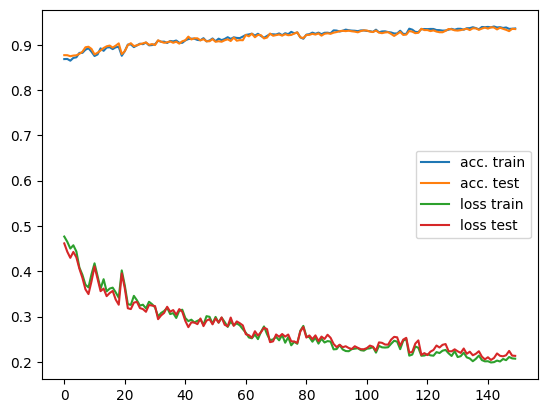

In [ ]:
# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step
        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        optim.zero_grad()
        L.backward()
        optim.step()

    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain*100, Ltrain, acctest*100, Ltest)
    print(title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach())
    curves[3].append(Ltest.detach())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas :
- First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?
- Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?
- Does the parameter C of regularization have an impact? Why ?

In [ ]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions):
      plt.figure(2)
      plt.clf()
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.pause(1e-3)

In [ ]:
import sklearn.svm

############################
### Your code here   #######
### Train the SVM    #######
## See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

###########################

#### svm lineare

In [ ]:

svm = sklearn.svm.LinearSVC()
svm.fit(Xtrain,Ytrain)

print(svm.score(Xtest,Ytest))

0.53


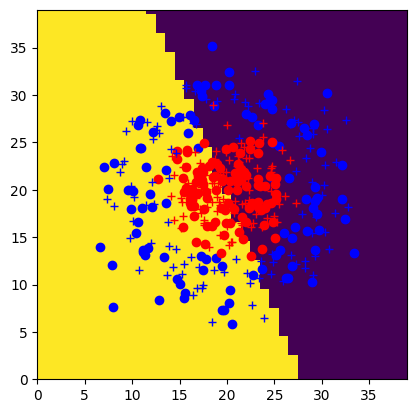

In [ ]:
plot_svm_predictions(data, svm.predict(Xgrid))

non il marche pas bien car nos données ont une forme qui n'est pas linearement séparable et notre svm n'applique pas de kernel pour prejeter les données dans une nouvelle dimension pour laquel nos données deviennent linerement séparable
donc on se contente d'un hyperblan simple

#### utilisation de kernel

Polynomial

In [ ]:
svm = sklearn.svm.SVC(kernel='poly')
svm.fit(Xtrain,Ytrain)

print(svm.score(Xtest,Ytest))

0.545


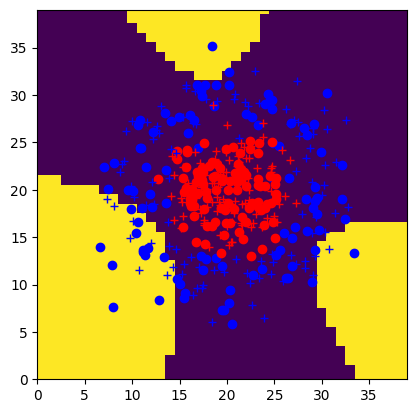

In [ ]:
plot_svm_predictions(data, svm.predict(Xgrid))

RBF

In [ ]:
svm = sklearn.svm.SVC(kernel='rbf')
svm.fit(Xtrain,Ytrain)

print(svm.score(Xtest,Ytest))

0.94


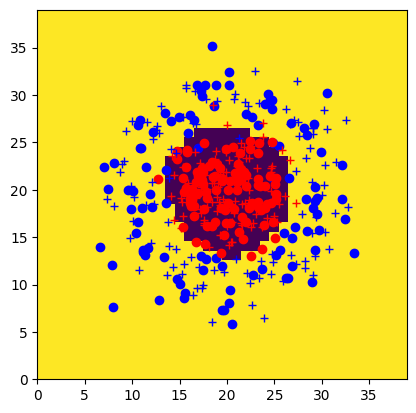

In [ ]:
plot_svm_predictions(data, svm.predict(Xgrid))

Sigmoid

In [ ]:
svm = sklearn.svm.SVC(kernel='sigmoid')
svm.fit(Xtrain,Ytrain)

print(svm.score(Xtest,Ytest))

0.65


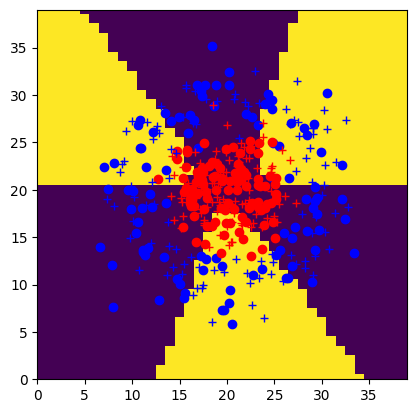

In [ ]:
plot_svm_predictions(data, svm.predict(Xgrid))

la sigmoide , poly, ne sont pas bonne car nos kernel deduise des forme qui ne sont pas rond

alors que nos données sont rend et rbf avec les gaussien le fait totalement

#### hyperparam C

In [ ]:
d={'score_train':[],'score_test':[]}
l_c=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for c in l_c:
  svm=sklearn.svm.SVC(C=c)
  svm.fit(Xtrain,Ytrain)
  d['score_train'].append(svm.score(Xtrain, Ytrain))
  d['score_test'].append(svm.score(Xtest,Ytest))

In [ ]:
pd.DataFrame(data=d,index=l_c)

,score_train,score_test
0.0001,0.955,0.950
0.0010,0.955,0.950
0.0100,0.955,0.950
0.1000,0.955,0.950
1.0000,0.960,0.940
10.0000,0.970,0.935
100.0000,0.975,0.930
1000.0000,0.975,0.930
10000.0000,0.980,0.935


oui il a un impact car plus la valeur c est grande plus l'importance au erreur (ceux qui ne satisfaissent pas la margin) sont pris plus en considiration donc cole plus au données train et on tombe en sur apprentissage